In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

In [3]:
df = pd.read_csv('Datasets/penguins_size.csv')
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181,3750,MALE
1,Adelie,Torgersen,39.5,17.4,186,3800,FEMALE
2,Adelie,Torgersen,40.3,18.0,195,3250,FEMALE
3,Adelie,Torgersen,36.7,19.3,193,3450,FEMALE
4,Adelie,Torgersen,39.3,20.6,190,3650,MALE


In [4]:
df.isnull().sum().sort_values(ascending=False)

sex                  8
island               0
species              0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
dtype: int64

In [5]:
df['species'].value_counts().sort_index()

species
Adelie       151
Chinstrap     68
Gentoo       123
Name: count, dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# df['species'] = le.fit_transform(df['species']) 
df['island'] = le.fit_transform(df['island'])
df['sex'] = le.fit_transform(df['sex'])
df['species'] = df['species'].map({'Adelie': 0, 'Chinstrap': 1, 'Gentoo': 2})

In [7]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df_imputed = imputer.fit_transform(df)

In [8]:
df_imputed = pd.DataFrame(df_imputed, columns=df.columns)

In [9]:
df_imputed

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0.0,2.0,39.1,18.7,181.0,3750.0,1.0
1,0.0,2.0,39.5,17.4,186.0,3800.0,0.0
2,0.0,2.0,40.3,18.0,195.0,3250.0,0.0
3,0.0,2.0,36.7,19.3,193.0,3450.0,0.0
4,0.0,2.0,39.3,20.6,190.0,3650.0,1.0
...,...,...,...,...,...,...,...
337,2.0,0.0,47.2,13.7,214.0,4925.0,0.0
338,2.0,0.0,46.8,14.3,215.0,4850.0,0.0
339,2.0,0.0,50.4,15.7,222.0,5750.0,1.0
340,2.0,0.0,45.2,14.8,212.0,5200.0,0.0


In [10]:
X = df_imputed.drop(columns=['species'])
y = df_imputed['species']

In [11]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
model = SVC(kernel='linear', C=1, probability=True)
model.fit(X_train, y_train)


SVC(C=1, kernel='linear', probability=True)

In [13]:
y_test_pred = model.predict(X_test)
y_test_pred

array([2., 0., 0., 0., 0., 2., 1., 1., 2., 0., 0., 2., 2., 2., 0., 1., 0.,
       0., 1., 0., 1., 0., 2., 0., 0., 0., 0., 1., 0., 2., 1., 0., 0., 2.,
       0., 0., 1., 2., 0., 0., 0., 0., 2., 2., 0., 1., 2., 2., 0., 0., 2.,
       1., 2., 0., 0., 1., 0., 2., 2., 0., 2., 2., 2., 2., 1., 1., 0., 0.,
       0.])

In [14]:
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
accuracy = accuracy_score(y_test_pred,y_test)
cls_report = classification_report(y_test_pred, y_test)
conf_mat = confusion_matrix(y_test_pred,y_test)

In [15]:
print(f"Accuracy: {accuracy:.2f}",end='\n\n')
print(f"confusion matrix: \n{conf_mat}",end = '\n\n')
print("Classification Report:\n",cls_report)

Accuracy: 0.99

confusion matrix: 
[[34  0  0]
 [ 1 12  0]
 [ 0  0 22]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      1.00      0.99        34
         1.0       1.00      0.92      0.96        13
         2.0       1.00      1.00      1.00        22

    accuracy                           0.99        69
   macro avg       0.99      0.97      0.98        69
weighted avg       0.99      0.99      0.99        69



<Axes: >

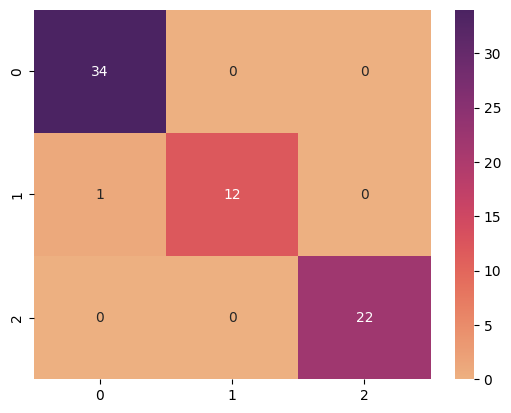

In [16]:
sns.heatmap(conf_mat,annot=True,cmap='flare')

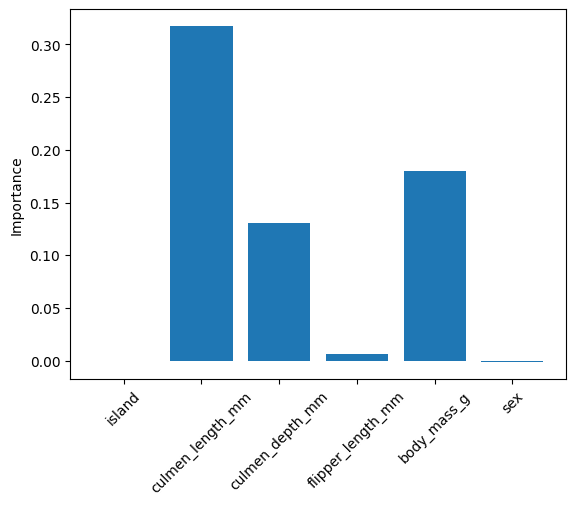

In [17]:
from sklearn.inspection import permutation_importance

result = permutation_importance(model, X_test, y_test, n_repeats=10)
plt.bar(X_train.columns, result.importances_mean)
plt.xticks(rotation=45)
plt.ylabel("Importance")
plt.show()


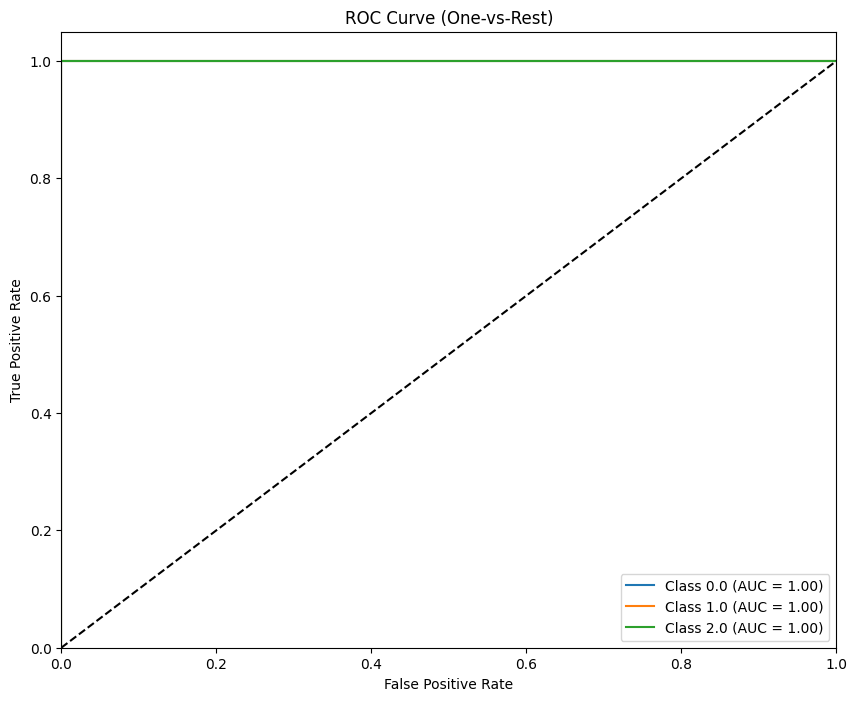

In [18]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

# Get predicted probabilities
y_proba = model.predict_proba(X_test)

plt.figure(figsize=(10, 8))

# Loop through each class
for i, class_label in enumerate(model.classes_):
    # Create binary labels for the current class
    y_true_binary = (y_test == class_label).astype(int)

    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_true_binary, y_proba[:, i])
    auc_score = roc_auc_score(y_true_binary, y_proba[:, i])

    plt.plot(fpr, tpr, label=f"Class {class_label} (AUC = {auc_score:.2f})")

# Plot the diagonal line for random guess
plt.plot([0, 1], [0, 1], 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (One-vs-Rest)")
plt.legend(loc="lower right")
plt.show()
